# Rule: **determine_availability_matrix**

**Outputs**

- resources/`availability_matrix_{clusters}_{technology}.nc`

In [90]:
######################################## Parameters

### Run
name = ''
prefix = ''

### Network
clusters = 5

In [91]:
##### Import packages
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import yaml
import os 
import sys
import xarray as xr



##### Import local functions
sys.path.append(os.path.abspath(os.path.join('..')))
import functions as xp


##### Read params.yaml
with open('../params.yaml', 'r') as configfile:
    params = yaml.safe_load(configfile)


##### Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)



## `availability_matrix_{clusters}_{technology}.nc`

In [92]:
technology = 'solar'
technology = 'onwind'
technology = 'offwind-float'

Load the availability matrix and show its content.

In [93]:
file = f'availability_matrix_{clusters}_{technology}.nc'
path = f'{params['rootpath']}/resources/{prefix}/{name}/'

am = xr.open_dataset(path+file)

am

<xarray.Dataset> Size: 930kB
Dimensions:                        (bus: 5, y: 131, x: 177)
Coordinates:
  * bus                            (bus) <U5 100B 'ES0 0' 'ES0 1' ... 'ES1 0'
  * y                              (y) float64 1kB 33.0 33.3 33.6 ... 71.7 72.0
  * x                              (x) float64 1kB -12.0 -11.7 ... 40.5 40.8
Data variables:
    __xarray_dataarray_variable__  (bus, y, x) float64 927kB ...

Plot the unique variable for all the buses (there is no overlap).

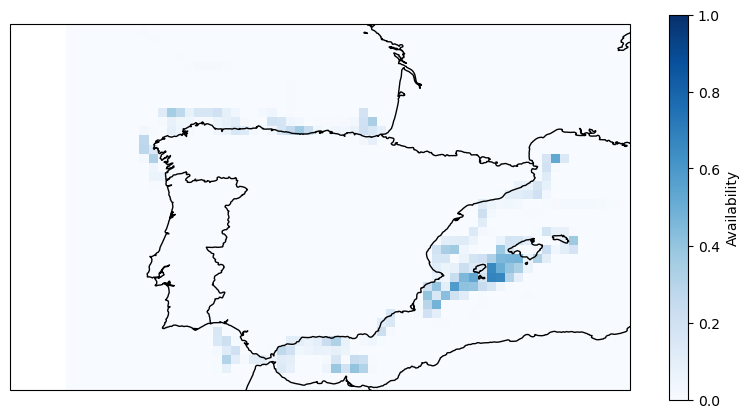

In [94]:
### Get the addition over buses
matrix_xy = am['__xarray_dataarray_variable__'].sum(dim='bus')



#################### Plot map
fig_size = [10, 5]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})

pcm = ax.pcolormesh(am.x, am.y, matrix_xy, cmap='Blues', vmin=0, vmax=1)

fig.colorbar(pcm, ax=ax, label="Availability")


### Add map features
xp.map_add_features(ax, params['map_add_features_line'])


### Set map limits
ax.set_extent(params['boundaries_offshore'])